In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('student_feedback (1).csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: 'student_feedback (1).csv' not found. Please ensure the file is in the correct directory.")

# Display the first few rows and basic info
print("--- Initial Data Preview ---")
print(df.head())
print("\n--- Data Information ---")
df.info()

File loaded successfully!
--- Initial Data Preview ---
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                            

In [3]:
# --- Data Cleaning ---

# 1. Drop the unnecessary 'Unnamed: 0' column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 2. Create shorter, more usable column names
new_column_names = {
    'Student ID': 'student_id',
    'Well versed with the subject': 'subject_knowledge',
    'Explains concepts in an understandable way': 'clarity_of_explanation',
    'Use of presentations': 'presentation_use',
    'Degree of difficulty of assignments': 'assignment_difficulty',
    'Solves doubts willingly': 'doubt_solving',
    'Structuring of the course': 'course_structure',
    'Provides support for students going above and beyond': 'extra_support',
    'Course recommendation based on relevance': 'course_recommendation'
}
df = df.rename(columns=new_column_names)

# 3. Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

# Display the cleaned data
print("\n--- Cleaned Data Preview ---")
print(df.head())

Total missing values: 0

--- Cleaned Data Preview ---
   student_id  subject_knowledge  clarity_of_explanation  presentation_use  \
0         340                  5                       2                 7   
1         253                  6                       5                 8   
2         680                  7                       7                 6   
3         806                  9                       6                 7   
4         632                  8                      10                 8   

   assignment_difficulty  doubt_solving  course_structure  extra_support  \
0                      6              9                 2              1   
1                      6              2                 1              2   
2                      5              4                 2              3   
3                      1              5                 9              4   
4                      4              6                 6              9   

   course_recommenda

--- Average Ratings per Category (1-10 Scale) ---
subject_knowledge         7.497502
clarity_of_explanation    6.081918
presentation_use          5.942058
extra_support             5.662338
course_structure          5.636364
course_recommendation     5.598402
doubt_solving             5.474525
assignment_difficulty     5.430569
dtype: float64


C:\Users\abhir\AppData\Local\Temp\ipykernel_984\87173239.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='viridis', orient='h')


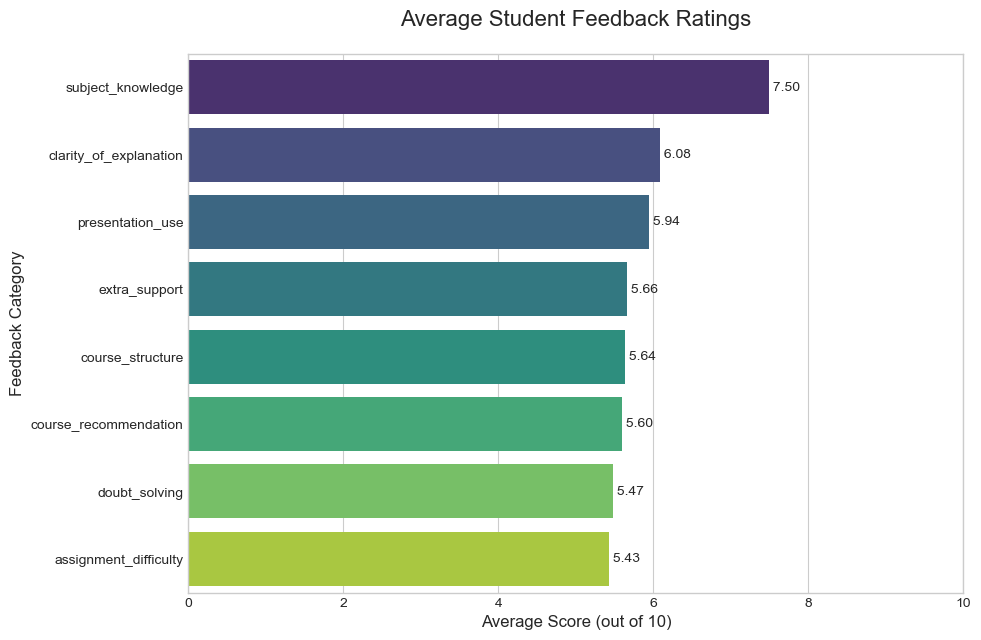

In [4]:
# Calculate the average rating for each category (excluding student_id)
average_ratings = df.drop(columns=['student_id']).mean().sort_values(ascending=False)

print("--- Average Ratings per Category (1-10 Scale) ---")
print(average_ratings)

# Visualize the average ratings
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))
sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='viridis', orient='h')

plt.title('Average Student Feedback Ratings', fontsize=16, pad=20)
plt.xlabel('Average Score (out of 10)', fontsize=12)
plt.ylabel('Feedback Category', fontsize=12)
plt.xlim(0, 10) # Set x-axis limit to match the rating scale

# Add data labels to the bars
for index, value in enumerate(average_ratings.values):
    plt.text(value, index, f' {value:.2f}', va='center')

plt.show()

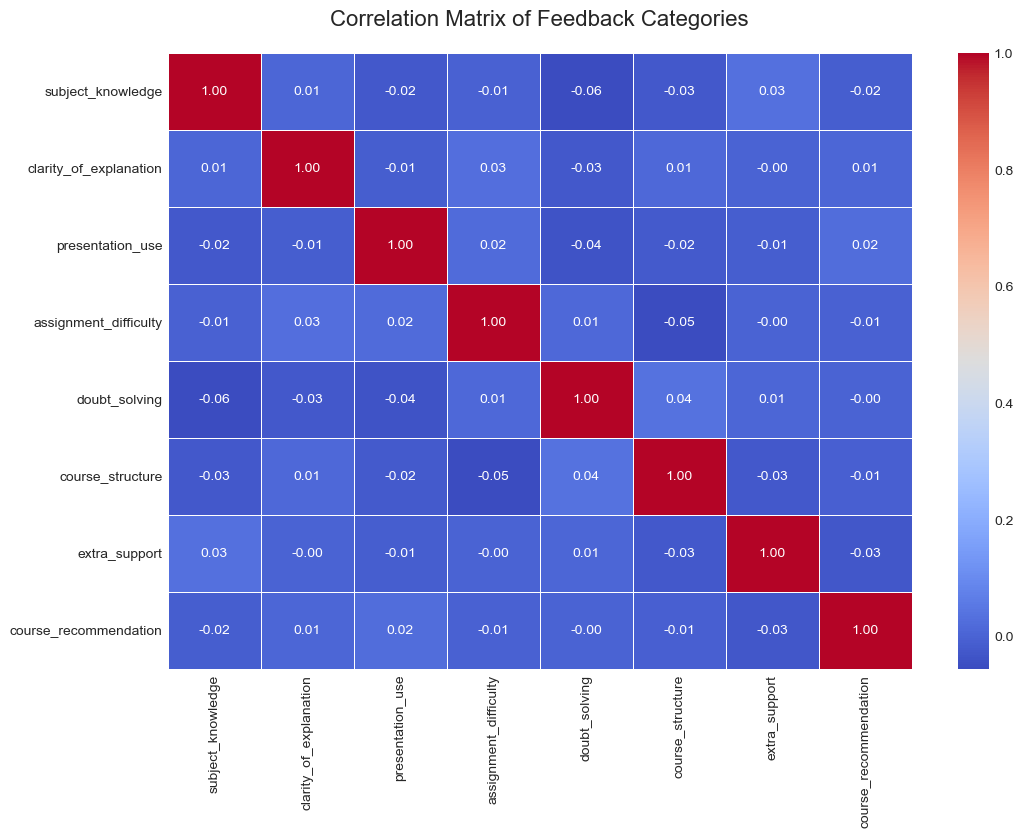

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['student_id']).corr()

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Feedback Categories', fontsize=16, pad=20)
plt.show()

subject_knowledge float64
clarity_of_explanation float64
presentation_use float64
assignment_difficulty float64
doubt_solving float64
course_structure float64
extra_support float64
course_recommendation float64

subject_knowledge float64
clarity_of_explanation float64
presentation_use float64
assignment_difficulty float64
doubt_solving float64
course_structure float64
extra_support float64
course_recommendation float64